# KNN




Reading data - 

In [288]:
import pandas as pd

columnlist = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']        
dataset = pd.read_csv('wine_quality.csv', names = columnlist)





• Data cleaning - In this section, we are identifying data which cannot be processed such as empty columns, data whose Quality column is empty & column whose count value is 1 or less for Quality column.
We are using Simple imputer to replace the missing values with mean of corresponding columns. Once done we are splitting data to test & train using sklearn. Once we split the values, we standardize the features using StandardScaler.

In [289]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Replace empty cells with NaN
dataset = dataset.apply(lambda x: pd.to_numeric(x, errors='coerce'))

#Drop cells whose Quality column is empty
dataset = dataset.dropna(subset = ['Quality'])

#Round off Quality column values if it isn't an integer
dataset.Quality = dataset.Quality.round()

#Drop cells whose quality column's count is less than or equal to 1
dataset = dataset.groupby('Quality').filter(lambda x: len(x.Quality) > 1)

#Split columns
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, len(columnlist) - 1]

#Replace empty cells with mean value of column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)

#Split training & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 4)

#Standardizing feature 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)




• KNN - In this section, we run knn with k value 1-25 in a loop and store the value for which accuracy is highest.

In [290]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

finalAccuracy = 0
knnNo = 0
predictions = []
accs = np.zeros((26))
accuracy = 0
for i in range(1,26):   
    knn = KNeighborsClassifier(n_neighbors=i)    
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = knn.score(x_test, y_test)
    accs[i] = accuracy
    #Save accuracy, n_neighbors & predictions for best model
    if finalAccuracy <= accuracy:
        finalAccuracy = accuracy
        knnNo = i
        predictions = y_pred
print("Accuracy -",accuracy, "for n_neighbours -",knnNo)


Accuracy - 0.5704081632653061 for n_neighbours - 1


Confusion Matrix - 


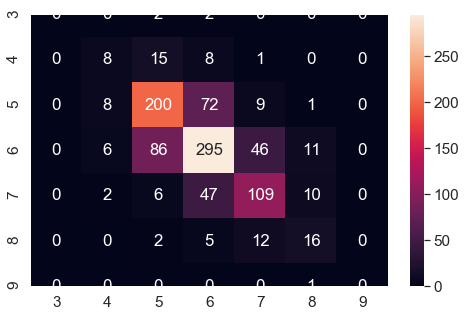

In [291]:
matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize = (8,5))
print("Confusion Matrix - ")
sn.heatmap(pd.DataFrame(matrix, range(3,10), range(3,10)),annot=True, fmt="d")

Predictions vs accuracy graph


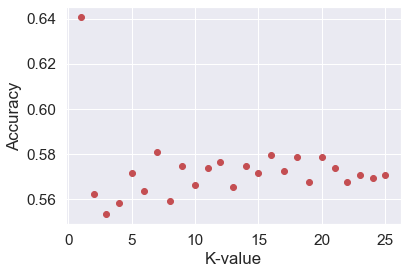

In [292]:
import matplotlib.pyplot as plt

print("Predictions vs accuracy graph")
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.plot(range(1,26), accs[1:27], 'ro')


• K-Fold cross validation - In this section, we divide the data with 6 folds, compute KNN on it & take out the average accuracy. The graph for accuracies are shown.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


Accuracy after cross validation -  0.6215267040440405


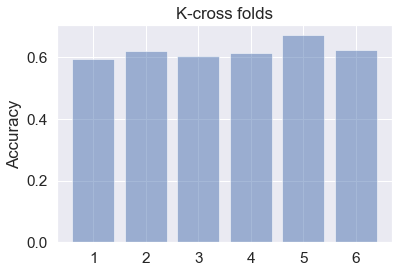

In [293]:
#Cross valudation
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

x = sc.fit_transform(x)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=knnNo), x_train, y_train, cv = 6)

objects = [1, 2, 3, 4, 5, 6]
y_pos = np.arange(len(objects))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('K-cross folds')

print("Accuracy after cross validation - ", sum(scores)/len(scores))




• Optimizing model using GridSearchCV - In this section, we we using GridSearchCV to compute KNN with k value as 1-25 and printing best accuracy & best model used.

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = dict(n_neighbors=list(range(1, 25)))
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=1), param_grid, cv=10, scoring='accuracy')
res = grid.fit(x_train, y_train)
print("Best estimator from GridSearchCV - ", res.best_estimator_)
print("Best score - ", res.best_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best estimator from GridSearchCV -  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Best score -  0.6345074017355794
